In [1]:
import sys

sys.path.append("..")
sys.path.append("../../")
sys.path.append("../../src")

import os
import jax
import matplotlib.pyplot as plt
from functional_autoencoders.datasets import get_dataloaders
from functional_autoencoders.datasets.navier_stokes import NavierStokes
from functional_autoencoders.util import pickle_load
from functional_autoencoders.util.masks import (
    get_mask_grf_torus,
    get_mask_rect,
    get_mask_uniform,
)
from plots import (
    plot_training_results,
    plot_reconstructions,
    plot_masked_reconstructions,
    plot_uniform_reconstruction_range,
    plot_upsamples,
    plot_mse_vs_mask_ratio,
)

# %load_ext autoreload
# %autoreload 2

key = jax.random.PRNGKey(42)

In [2]:
MODEL_OUT_DIR = "../../tmp/experiments/sparse_training/models"
VISCOSITY = 1e-4

train_dataloader_full, test_dataloader_full = get_dataloaders(
    NavierStokes, data_base="../..", viscosity=VISCOSITY, resolution=64, load_fast=True
)

info = pickle_load(os.path.join(MODEL_OUT_DIR, "model.pkl"))
results = info["results"]
autoencoder = info["autoencoder"]
state = results["state"]

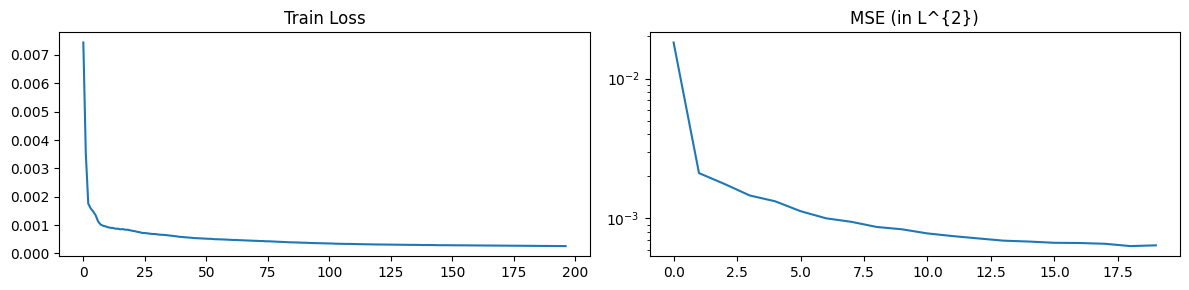

MSE (in L^{2}): 6.428e-04
Number of parameters: 64857


In [3]:
plt.rcParams["figure.figsize"] = (12, 3)

plot_training_results(results)

In [4]:
test_dataloader_iter = iter(test_dataloader_full)

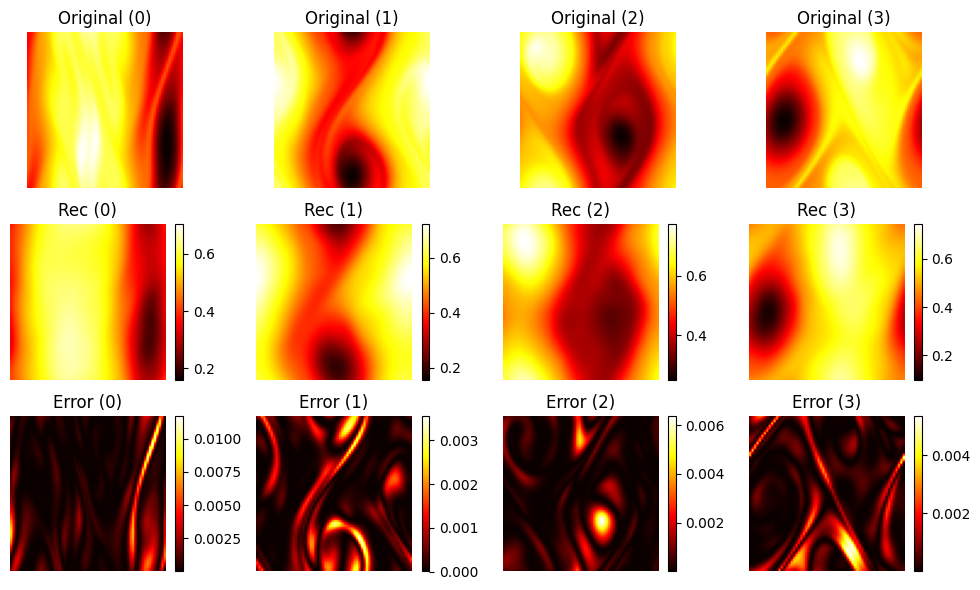

In [5]:
plt.rcParams["figure.figsize"] = (10, 6)

N_RECS = 4

plot_reconstructions(
    autoencoder=autoencoder,
    state=state,
    dataloader_iter=test_dataloader_iter,
    n_recs=N_RECS,
)

In [6]:
test_dataloader_iter = iter(test_dataloader_full)

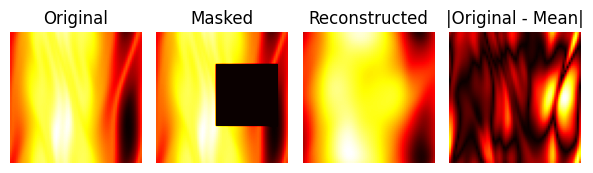

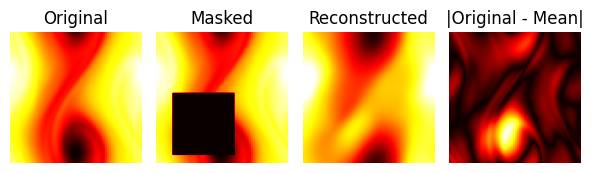

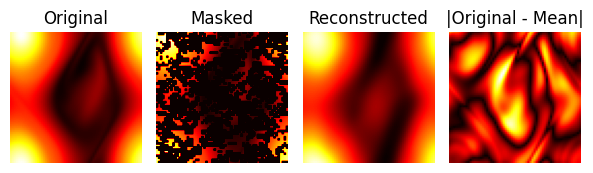

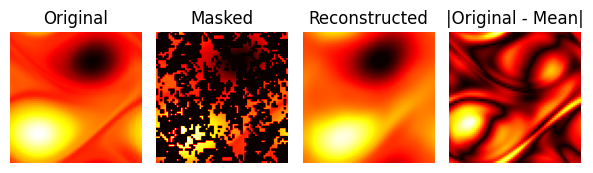

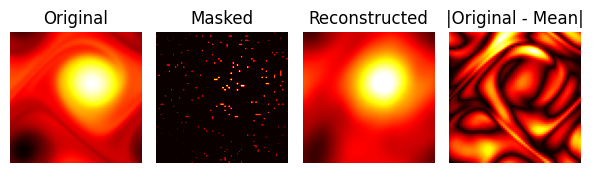

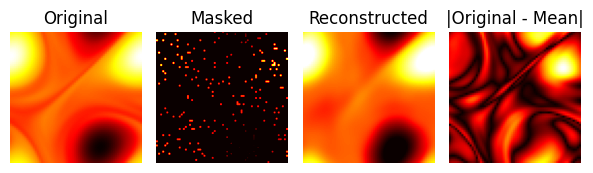

In [7]:
plt.rcParams["figure.figsize"] = (6, 9)

N_RECS = 2
CMAP = "hot"
SAVE_DIR = None
# SAVE_DIR = '../../figures/sparse_training/inpainting_appendix'
# os.makedirs(SAVE_DIR, exist_ok=True)

path_rec = None
path_grf = None
path_uni = None

if SAVE_DIR is not None:
    path_rec = os.path.join(SAVE_DIR, "0")
    path_grf = os.path.join(SAVE_DIR, "0")
    path_uni = os.path.join(SAVE_DIR, "0")
    os.makedirs(path_rec, exist_ok=True)
    os.makedirs(path_grf, exist_ok=True)
    os.makedirs(path_uni, exist_ok=True)

get_mask_fn = lambda key, u: get_mask_rect(key, u, h=30, w=30)
key, subkey = jax.random.split(key)
plot_masked_reconstructions(
    key=subkey,
    autoencoder=autoencoder,
    state=state,
    dataloader_iter=test_dataloader_iter,
    get_mask_fn=get_mask_fn,
    n_recs=N_RECS,
    cmap=CMAP,
    save_dir=path_rec,
)

get_mask_fn = lambda key, u: get_mask_grf_torus(key, u, threshold=-0.05, tau=30, d=1.2)
key, subkey = jax.random.split(key)
plot_masked_reconstructions(
    key=subkey,
    autoencoder=autoencoder,
    state=state,
    dataloader_iter=test_dataloader_iter,
    get_mask_fn=get_mask_fn,
    n_recs=N_RECS,
    cmap=CMAP,
    save_dir=path_grf,
)

get_mask_fn = lambda key, u: get_mask_uniform(key, u, mask_ratio=0.95)
key, subkey = jax.random.split(key)
plot_masked_reconstructions(
    key=subkey,
    autoencoder=autoencoder,
    state=state,
    dataloader_iter=test_dataloader_iter,
    get_mask_fn=get_mask_fn,
    n_recs=N_RECS,
    cmap=CMAP,
    save_dir=path_uni,
)

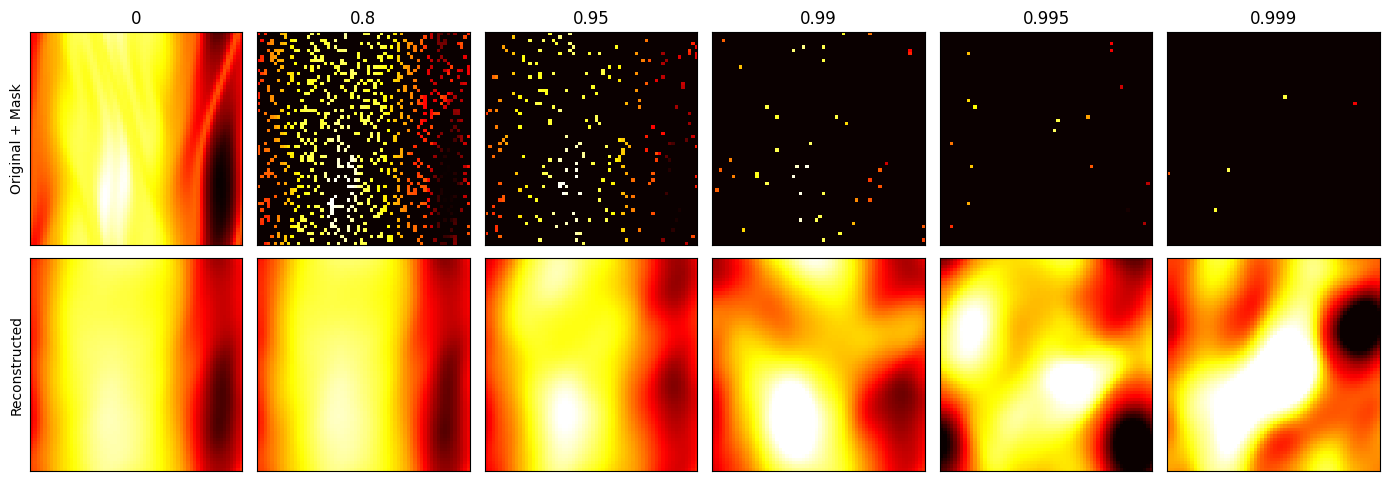

In [8]:
plt.rcParams["figure.figsize"] = (14, 5)

N_RECS = 1
SAVE_DIR = None
# SAVE_DIR = 'poster_figures/uniform_reconstruction_range'
# os.makedirs(SAVE_DIR, exist_ok=True)

key, subkey = jax.random.split(key)
plot_uniform_reconstruction_range(
    key=subkey,
    autoencoder=autoencoder,
    state=state,
    dataloader_iter=iter(test_dataloader_full),
    mask_ratios=[0, 0.80, 0.95, 0.99, 0.995, 0.999],
    n_recs=N_RECS,
    cmap="hot",
    save_dir=SAVE_DIR,
)

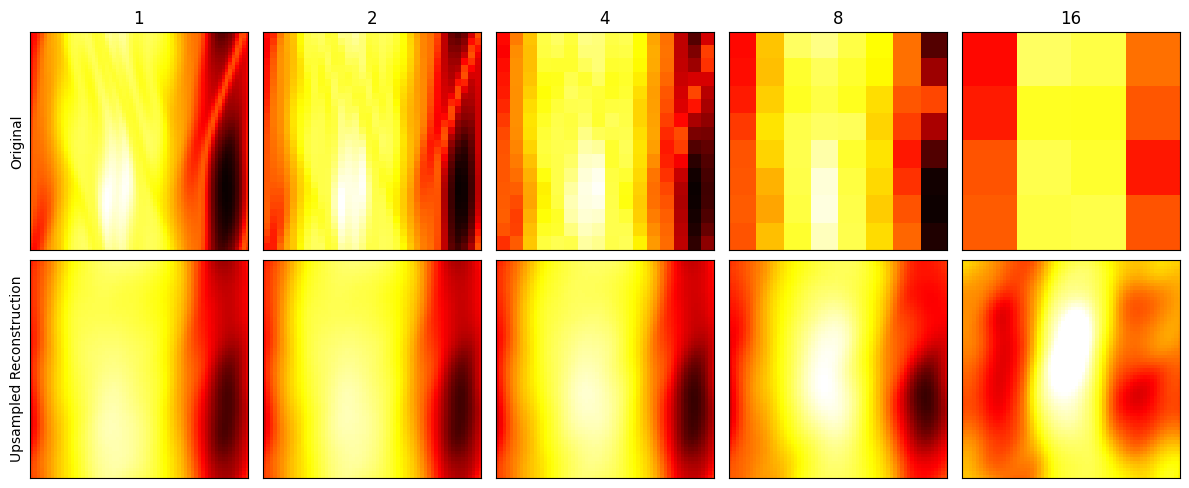

In [9]:
plt.rcParams["figure.figsize"] = (12, 5)

N_RECS = 1
SAVE_DIR = None
# SAVE_DIR = '../../figures/sparse_training/superresolution'
# os.makedirs(SAVE_DIR, exist_ok=True)

key, subkey = jax.random.split(key)
plot_upsamples(
    autoencoder=autoencoder,
    state=state,
    dataloader_iter=iter(test_dataloader_full),
    downsample_ratios=[1, 2, 4, 8, 16],
    n_recs=N_RECS,
    cmap="hot",
    save_dir=SAVE_DIR,
)

  0%|          | 0/5 [00:00<?, ?it/s]

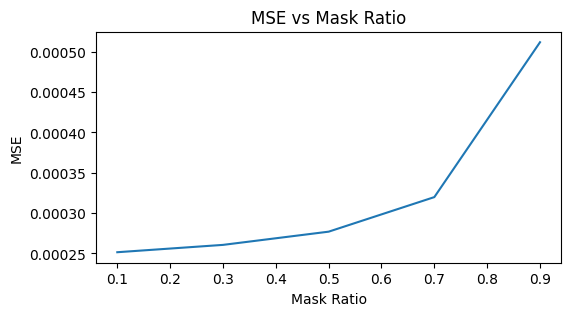

In [10]:
plt.rcParams["figure.figsize"] = (6, 3)

MASK_RATIOS = [0.1, 0.3, 0.5, 0.7, 0.9]

SAVE_DIR = None
# SAVE_DIR = 'poster_figures/mse_vs_mask_ratio'
# os.makedirs(SAVE_DIR, exist_ok=True)

key, subkey = jax.random.split(key)
plot_mse_vs_mask_ratio(
    key=subkey,
    autoencoder=autoencoder,
    state=state,
    mask_ratios=MASK_RATIOS,
    dataloader=test_dataloader_full,
    save_dir=SAVE_DIR,
)